<a href="https://colab.research.google.com/github/rts1988/Duolingo_spaced_repetition/blob/main/Duolingo_lexemes_charIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import bz2
import pickle
import _pickle as cPickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

def compressed_pickle(title, data):  # do not add extension in filename
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
  cPickle.dump(data, f)

path_name = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
q1lexemes = decompress_pickle(path_name+"q1_lexeme_features.pbz2")

In [27]:
q1lexemes_chgrams = q1lexemes.drop(['index','learning_language','lexeme_string','lemma_form','pos','modstrings','sf_length'],axis=1)
q1lexemes_chgrams

,lexeme_id,surface_form,mod_*gndr,mod_*numb,mod_*pers,mod_@compound_past,mod_@cond_perfect,mod_@det:a_le,mod_@det:de_le,mod_@formal,...,êt,ête,ía,ían,ías,ín,ît,ña,ño,ón
0,73eecb492ca758ddab5371cf7b5cca32,bajo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,c84476c460737d9fb905dca3d35ec995,niños,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512787,0.0
2,1a913f2ded424985b9c02d0436008511,leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,38b770e66595fea718366523b4f7db3f,libro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,4bdb859f599fa07dd5eecdab0acc2d34,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12155,822db15e4e056837f908d47692f6969e,ajuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12156,aa25ea9dc156919749f444521720432c,conférence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12157,3db97fbbdd0d4e08b8248b6219a86e4b,liens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
12158,8b53845a67433bd62179e23bcb88b5c3,foi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [28]:
q1lexemes_chgrams = q1lexemes_chgrams.drop([col for col in q1lexemes_chgrams.columns if col.startswith('mod_')],axis=1)

In [29]:
q1lexemes_chgrams =q1lexemes_chgrams.drop(['num_tokens','num_accents','num_spchar'],axis=1)

In [30]:
q1lexemes_chgrams.head()

,lexeme_id,surface_form,ab,aba,abaj,abe,abi,abl,abla,able,...,êt,ête,ía,ían,ías,ín,ît,ña,ño,ón
0,73eecb492ca758ddab5371cf7b5cca32,bajo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,c84476c460737d9fb905dca3d35ec995,niños,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512787,0.0
2,1a913f2ded424985b9c02d0436008511,leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,38b770e66595fea718366523b4f7db3f,libro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,4bdb859f599fa07dd5eecdab0acc2d34,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [31]:
q1lexemes_chgrams['idfsum'] = q1lexemes_chgrams.loc[:,'ab':].sum(axis=1)

In [34]:
q1lexemes_chgrams_sub =q1lexemes_chgrams[['lexeme_id','idfsum']]

In [33]:
datadfq1 = decompress_pickle(path_name+"Unseen_words_training_set.pbz2") 

In [41]:
datadfq1_sub = datadfq1[['p_recall','session_seen','lexeme_id']]

In [42]:
datadfq1_chidf = pd.merge(left = datadfq1_sub,right =q1lexemes_chgrams_sub,left_on='lexeme_id',right_on = 'lexeme_id',how="left")

In [43]:
datadfq1_chidf.head()

,p_recall,session_seen,lexeme_id,idfsum
0,1.0,1,73eecb492ca758ddab5371cf7b5cca32,1.767350
1,1.0,1,73eecb492ca758ddab5371cf7b5cca32,1.767350
2,1.0,2,c84476c460737d9fb905dca3d35ec995,1.168059
3,1.0,2,1a913f2ded424985b9c02d0436008511,0.810480
4,1.0,4,38b770e66595fea718366523b4f7db3f,2.293173


In [44]:
datadfq1_chidf['p_forgot_bin'] = np.where(1 - datadfq1_chidf['p_recall']>0,1,0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


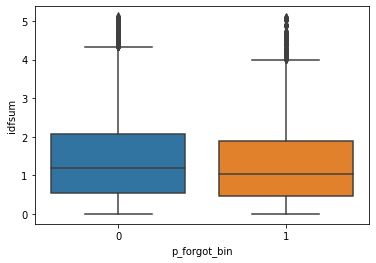

In [49]:
sns.boxplot(datadfq1_chidf.loc[datadfq1_chidf['session_seen']>5,'p_forgot_bin'],datadfq1_chidf.loc[datadfq1_chidf['session_seen']>5,'idfsum'])

In [13]:
q1lexemes_chgrams.loc[:,'ab':] = np.where(q1lexemes_chgrams.loc[:,'ab':]>0,1,0)

In [15]:
chgram_freq = q1lexemes_chgrams.sum(axis=0)

In [21]:
chgram_idf = chgram_freq.apply(lambda x: 1/(x+1) if type(x)!=str else x)

In [22]:
chgram_idf.head(10)

lexeme_id       73eecb492ca758ddab5371cf7b5cca32c84476c460737d...
surface_form    bajoniñosleolibroaleequéquieresellosniñoescrib...
num_tokens                                               0.000082
num_accents                                              0.000894
num_spchar                                               0.017241
ab                                                       0.006757
aba                                                      0.023256
abaj                                                     0.111111
abe                                                      0.076923
abi                                                      0.066667
dtype: object

In [ ]:
plt.plot(chgram_idf.loc['ab':]